# ROC-Kurve

* Beispiel 1: Logistische Regression: Vorhersage, ob Klausur bestanden wird
* Beispiel 2: Vorhersage, ob eine Herzerkrankung vorliegt

## Beispiel 1

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/troescherw/datasets/master/Klausur_Bestanden.csv"
df = pd.read_csv(url, delimiter=";")
df.head()

,Stunden,BesuchteVorlesungen,Vorbereitungskurs,KlausurBestanden
0,2,3,0,0
1,51,12,1,1
2,19,12,1,0
3,0,10,0,0
4,2,1,0,0


In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.glm("KlausurBestanden~Stunden", data=df, family=sm.families.Binomial()).fit()
pred = model.predict(df)


[]

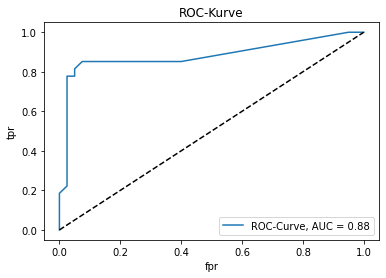

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, thresholds = roc_curve(df.KlausurBestanden, pred)

auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=str("ROC-Curve, AUC = " + str(np.round(auc_score,2))))
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.title("ROC-Kurve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc="lower right")
plt.plot()

## Beispiel 2

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/troescherw/datasets/master/heartdisease.csv"
headers = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","status"]
df = pd.read_csv(url, header=None)
df.columns=headers
df.status = [0 if s==0 else 1 for s in df.status]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report
import numpy as np

X = df
y = df.status

# Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)



# Modell erstellen
# cp, restecg und slope sind kategoriale Variablen

model = smf.glm("status~age+sex+C(cp)+trestbps+chol+fbs+C(restecg)+thalach+exang+oldpeak+C(slope)+ca+thal", 
                data=X_train, family=sm.families.Binomial()).fit()

# Vorhersage mit Testdaten
pred = model.predict(X_test)
pred_class = [0 if x <0.5 else 1 for x in pred]

# Modellreport
print(classification_report(pred_class, y_test))



              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.83      0.85      0.84        40

    accuracy                           0.86        91
   macro avg       0.85      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



[]

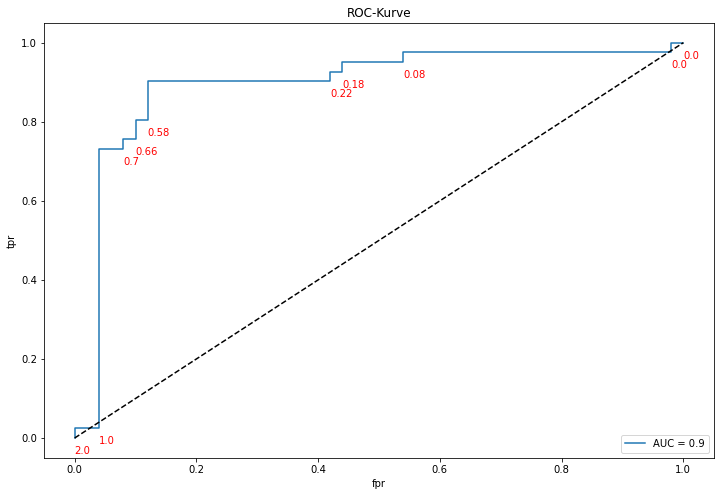

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

fpr, tpr, thresholds = roc_curve(y_test, pred)
auc_score = auc(fpr, tpr)

lbl = "AUC = " + str(np.round(auc_score,2))
plt.plot(fpr, tpr, label=lbl)
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.title("ROC-Kurve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc="lower right")


for x, y, txt in zip(fpr[::2], tpr[::2], thresholds[::2]):
    plt.annotate(np.round(txt,2), (x, y-0.04), color="r")
plt.plot()


In [7]:
# Optimaler Cut-Off
# tpr soll hoch sein, fpr niedrig ==> Wo ist die Differenz am größten?
# ==> argmax liefert Index mit dem größten Wert
print(np.argmax(tpr-fpr))
print("Optimaler Cut-Off = " , thresholds[np.argmax(tpr-fpr)])
print("fpr = ", fpr[np.argmax(tpr-fpr)])
print("tpr = ", tpr[np.argmax(tpr-fpr)])


9
Optimaler Cut-Off =  0.4434701174526166
fpr =  0.12
tpr =  0.9024390243902439
